In [ ]:
Git Hub: 

# Actividad de Aprendizaje 4: Aprendizaje No Supervisado
**Nombre:** Ruben Casa
**Asignatura:** Machine Learning

## 1. Carga y Exploración del Dataset

In [20]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.mixture import GaussianMixture
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

***Utilice el dataset Wine o Iris (de sklearn.datasets)***

In [19]:
from sklearn.datasets import load_wine

# Cargar el dataset 
data = load_wine()

# Crear DataFrame
df = pd.DataFrame(data=data.data, columns=data.feature_names)
df['target'] = data.target

# Mostrar las primeras filas
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


***Realice una exploración básica: dimensiones, tipos de variables y 
estadísticas descriptivas***

In [3]:
# Dimensiones del dataset (filas, columnas)
print(f"Dimensiones: {df.shape}")

# Tipos de variables e información general
print("\nInformación del dataset:")
df.info()

#  Estadísticas descriptivas
print("\nEstadísticas descriptivas:")
df.describe()

Dimensiones: (178, 14)

Información del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline        

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258,0.938202
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474,0.775035
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,0.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000,0.000000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,1.000000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,2.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,2.000000


Verificamos la estructura técnica del dataset y la ausencia de valores nulos; además, analizamos estadísticas descriptivas clave para comprender la distribución numérica de las variables.

***Estandarice las características con StandardScaler***

In [4]:
from sklearn.preprocessing import StandardScaler

# Separar las características (excluyendo el target)
X = df.drop('target', axis=1)

# Inicializar y aplicar StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Crear un DataFrame con los datos escalados para facilitar su uso
df_scaled = pd.DataFrame(X_scaled, columns=X.columns)

# Mostrar las primeras filas estandarizadas
df_scaled.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,1.518613,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.659563,1.224884,0.251717,0.362177,1.847920,1.013009
1,0.246290,-0.499413,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.820719,-0.544721,-0.293321,0.406051,1.113449,0.965242
2,0.196879,0.021231,1.109334,-0.268738,0.088358,0.808997,1.215533,-0.498407,2.135968,0.269020,0.318304,0.788587,1.395148
3,1.691550,-0.346811,0.487926,-0.809251,0.930918,2.491446,1.466525,-0.981875,1.032155,1.186068,-0.427544,1.184071,2.334574
4,0.295700,0.227694,1.840403,0.451946,1.281985,0.808997,0.663351,0.226796,0.401404,-0.319276,0.362177,0.449601,-0.037874


Separamos las variables predictoras. Utilizamos StandardScaler para normalizar la distribución de los datos, garantizando media cero y varianza unitaria.

# 2. Implementación de Métodos de Clustering

***Aplique y compare los siguientes algoritmos:***

***K-Means: pruebe diferentes valores de k (ej. 2 a 6) y seleccione el 
óptimo mediante Silhouette Score***

In [12]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Rango de k a probar
range_n_clusters = range(2, 7)
best_k = -1
best_score = -1

print("Evaluación de Silhouette Score:")
for k in range_n_clusters:
    # Inicializar y ajustar K-Means
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    cluster_labels = kmeans.fit_predict(X_scaled)
    
    # Calcular Silhouette Score
    score = silhouette_score(X_scaled, cluster_labels)
    print(f"Para k={k}, Silhouette Score: {score:.4f}")
    
    # Guardar el mejor resultado
    if score > best_score:
        best_score = score
        best_k = k

print(f"\nEl valor óptimo de k es: {best_k} (Score: {best_score:.4f})")

# Entrenar el modelo final con el k óptimo
kmeans_optimo = KMeans(n_clusters=best_k, random_state=42, n_init=10)
df['cluster_kmeans'] = kmeans_optimo.fit_predict(X_scaled)

Evaluación de Silhouette Score:
Para k=2, Silhouette Score: 0.2593
Para k=3, Silhouette Score: 0.2849
Para k=4, Silhouette Score: 0.2602
Para k=5, Silhouette Score: 0.2016


c:\Users\RubenC\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\RubenC\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\RubenC\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\RubenC\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Wi

Para k=6, Silhouette Score: 0.2372

El valor óptimo de k es: 3 (Score: 0.2849)


c:\Users\RubenC\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Al comparar los puntajes, observamos que $k=3$ obtiene el valor más alto (0.2849). Esto indica que dividir los datos en tres grupos maximiza la cohesión y separación entre ellos.

***Clustering Jerárquico: use diferentes métodos de enlace (single, 
complete, average, ward)***

Evaluación de Clustering Jerárquico (k=3):
Método: single     | Silhouette Score: 0.1827
Método: complete   | Silhouette Score: 0.2038
Método: average    | Silhouette Score: 0.1575
Método: ward       | Silhouette Score: 0.2774


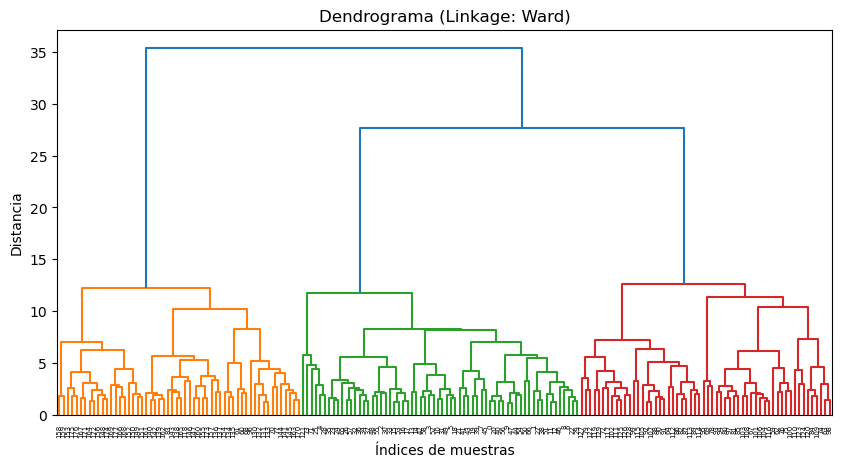

In [13]:
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage

methods = ['single', 'complete', 'average', 'ward']

print(f"Evaluación de Clustering Jerárquico (k={best_k}):")
for method in methods:
    # Ajustar Clustering Jerárquico
    hc = AgglomerativeClustering(n_clusters=best_k, linkage=method)
    labels_hc = hc.fit_predict(X_scaled)
    
    # Calcular Silhouette Score
    score = silhouette_score(X_scaled, labels_hc)
    print(f"Método: {method:<10} | Silhouette Score: {score:.4f}")

# Dendrograma 
plt.figure(figsize=(10, 5))
plt.title("Dendrograma (Linkage: Ward)")
Z = linkage(X_scaled, method='ward')
dendrogram(Z)
plt.xlabel("Índices de muestras")
plt.ylabel("Distancia")
plt.show()

Evaluamos un rango de $k$ clusters mediante Silhouette Score para definir la mejor segmentación. Viendo que el dendrograma sugiere visualmente 3 grupos

***DBSCAN: ajuste los parámetros eps y min_samples para detectar 
densidades***

In [14]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score 
import numpy as np

# Definir rangos de parámetros a probar
eps_values = [0.5, 1.0, 1.5, 2.0, 2.5]
min_samples_values = [3, 5, 7, 10]

print("Evaluación de DBSCAN:")
print(f"{'eps':<5} {'min_samples':<12} {'Clusters':<10} {'Ruido':<8} {'Silhouette':<10}")

for eps in eps_values:
    for min_samples in min_samples_values:
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        labels = dbscan.fit_predict(X_scaled)
        
        # Contar clusters (excluyendo ruido -1) y puntos de ruido
        n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
        n_noise = list(labels).count(-1)
        
        # Calcular Silhouette solo si hay más de 1 cluster válido
        if n_clusters > 1:
            score = silhouette_score(X_scaled, labels)
            print(f"{eps:<5.1f} {min_samples:<12} {n_clusters:<10} {n_noise:<8} {score:.4f}")
        else:
            print(f"{eps:<5.1f} {min_samples:<12} {n_clusters:<10} {n_noise:<8} {'N/A':<10}")

Evaluación de DBSCAN:
eps   min_samples  Clusters   Ruido    Silhouette
0.5   3            0          178      N/A       
0.5   5            0          178      N/A       
0.5   7            0          178      N/A       
0.5   10           0          178      N/A       
1.0   3            0          178      N/A       
1.0   5            0          178      N/A       
1.0   7            0          178      N/A       
1.0   10           0          178      N/A       
1.5   3            8          147      -0.2768
1.5   5            0          178      N/A       
1.5   7            0          178      N/A       
1.5   10           0          178      N/A       
2.0   3            5          64       0.0314
2.0   5            5          85       -0.0329
2.0   7            3          110      -0.0274
2.0   10           1          139      N/A       
2.5   3            1          23       N/A       
2.5   5            1          24       N/A       
2.5   7            1          29       N/

DBSCAN descartó muchos datos como ruido. Su mejor resultado, 0.2044, fue inferior a K-Means, indicando que la densidad irregular del dataset dificultó la clusterización.

***GMM (Gaussian Mixture Models): estime el número óptimo de 
componentes con el criterio BIC/AIC***

c:\Users\RubenC\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\RubenC\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\RubenC\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\RubenC\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Wi

Número óptimo de componentes según BIC: 2
Número óptimo de componentes según AIC: 10


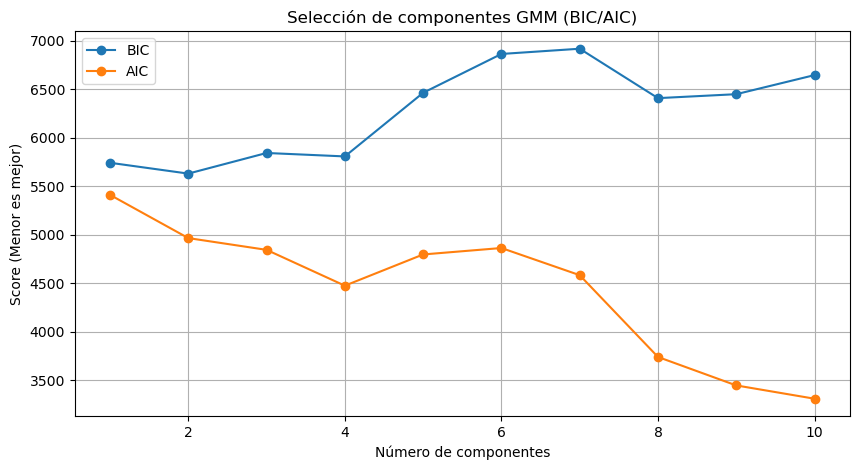

In [15]:
from sklearn.mixture import GaussianMixture
import matplotlib.pyplot as plt

# Rango de componentes a probar
n_components_range = range(1, 11)
bic_scores = []
aic_scores = []

for n in n_components_range:
    gmm = GaussianMixture(n_components=n, random_state=42)
    gmm.fit(X_scaled)
    bic_scores.append(gmm.bic(X_scaled))
    aic_scores.append(gmm.aic(X_scaled))

# Encontrar el óptimo (menor valor es mejor)
best_k_bic = n_components_range[np.argmin(bic_scores)]
best_k_aic = n_components_range[np.argmin(aic_scores)]

print(f"Número óptimo de componentes según BIC: {best_k_bic}")
print(f"Número óptimo de componentes según AIC: {best_k_aic}")

# Visualización
plt.figure(figsize=(10, 5))
plt.plot(n_components_range, bic_scores, label='BIC', marker='o')
plt.plot(n_components_range, aic_scores, label='AIC', marker='o')
plt.title('Selección de componentes GMM (BIC/AIC)')
plt.xlabel('Número de componentes')
plt.ylabel('Score (Menor es mejor)')
plt.legend()
plt.grid(True)
plt.show()

BIC sugiere 2 componentes priorizando simplicidad, mientras AIC propone 10. Ante esto,  BIC es mejor  para evitar un sobreajuste innecesario.

# 3. Visualización 

***Genere gráficos 2D de los clústeres obtenidos (usando PCA para 
reducir a 2D si es necesario)***

c:\Users\RubenC\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\RubenC\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


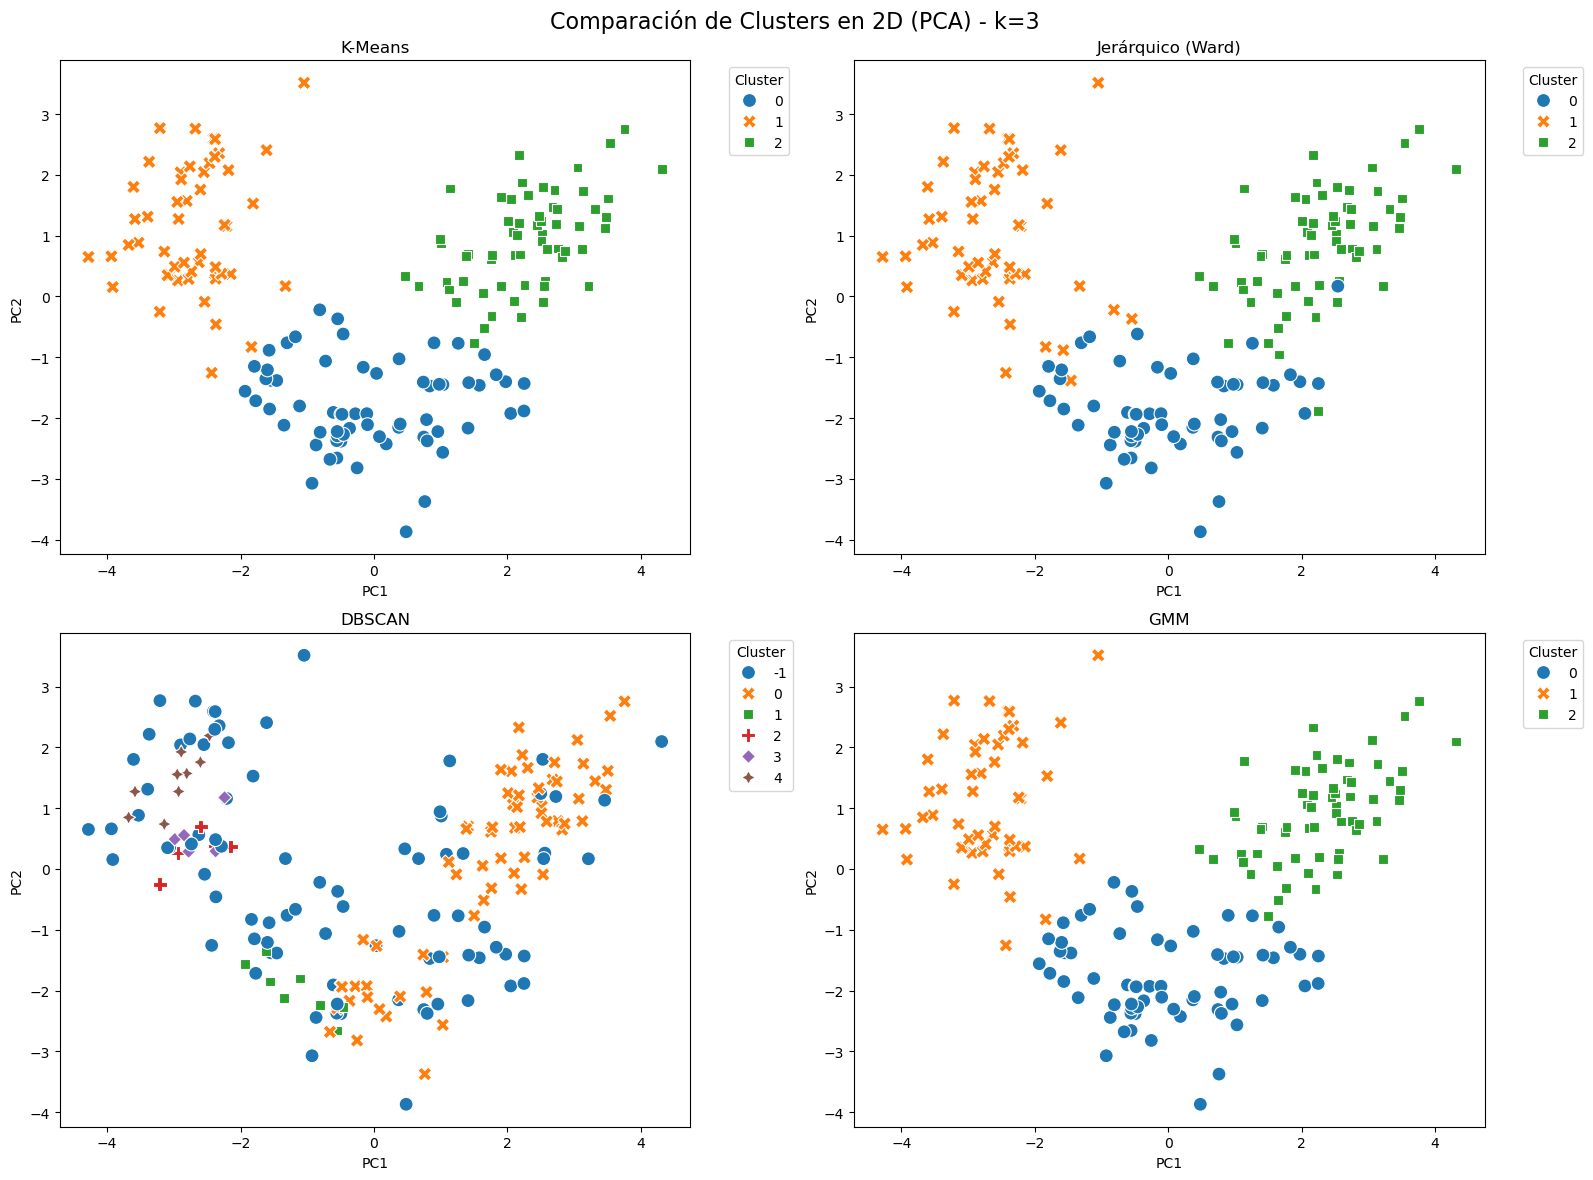

In [21]:
# Reducción de dimensionalidad a 2D con PCA
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X_scaled)
df_plot = pd.DataFrame(data=X_pca, columns=['PC1', 'PC2'])

# Etiquetas de los modelos para comparar
k_plot = best_k if 'best_k' in locals() else 3

# K-Means
kmeans = KMeans(n_clusters=k_plot, random_state=42, n_init=10)
labels_kmeans = kmeans.fit_predict(X_scaled)

# Jerárquico (Ward)
hc = AgglomerativeClustering(n_clusters=k_plot, linkage='ward')
labels_hc = hc.fit_predict(X_scaled)

# DBSCAN
dbscan = DBSCAN(eps=2.0, min_samples=5) 
labels_dbscan = dbscan.fit_predict(X_scaled)

# GMM
gmm = GaussianMixture(n_components=k_plot, random_state=42)
labels_gmm = gmm.fit_predict(X_scaled)

# Visualización en Grilla 2x2
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle(f'Comparación de Clusters en 2D (PCA) - k={k_plot}', fontsize=16)

# Los plots a realizar
plot_config = [
    (labels_kmeans, 'K-Means'),
    (labels_hc, 'Jerárquico (Ward)'),
    (labels_dbscan, 'DBSCAN'),
    (labels_gmm, 'GMM')
]

for ax, (labels, title) in zip(axes.flat, plot_config):
    sns.scatterplot(x='PC1', y='PC2', hue=labels, palette='tab10', data=df_plot, ax=ax, s=100, style=labels)
    ax.set_title(title)
    ax.legend(title='Cluster', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

El K-Means, Jerárquico y GMM logran separar los tres grupos con resultados casi idénticos. En cambio, DBSCAN presenta mucho ruido disperso, confirmando que su enfoque por densidad no es eficaz para este dataset.

***Compare visualmente los resultados de cada método***

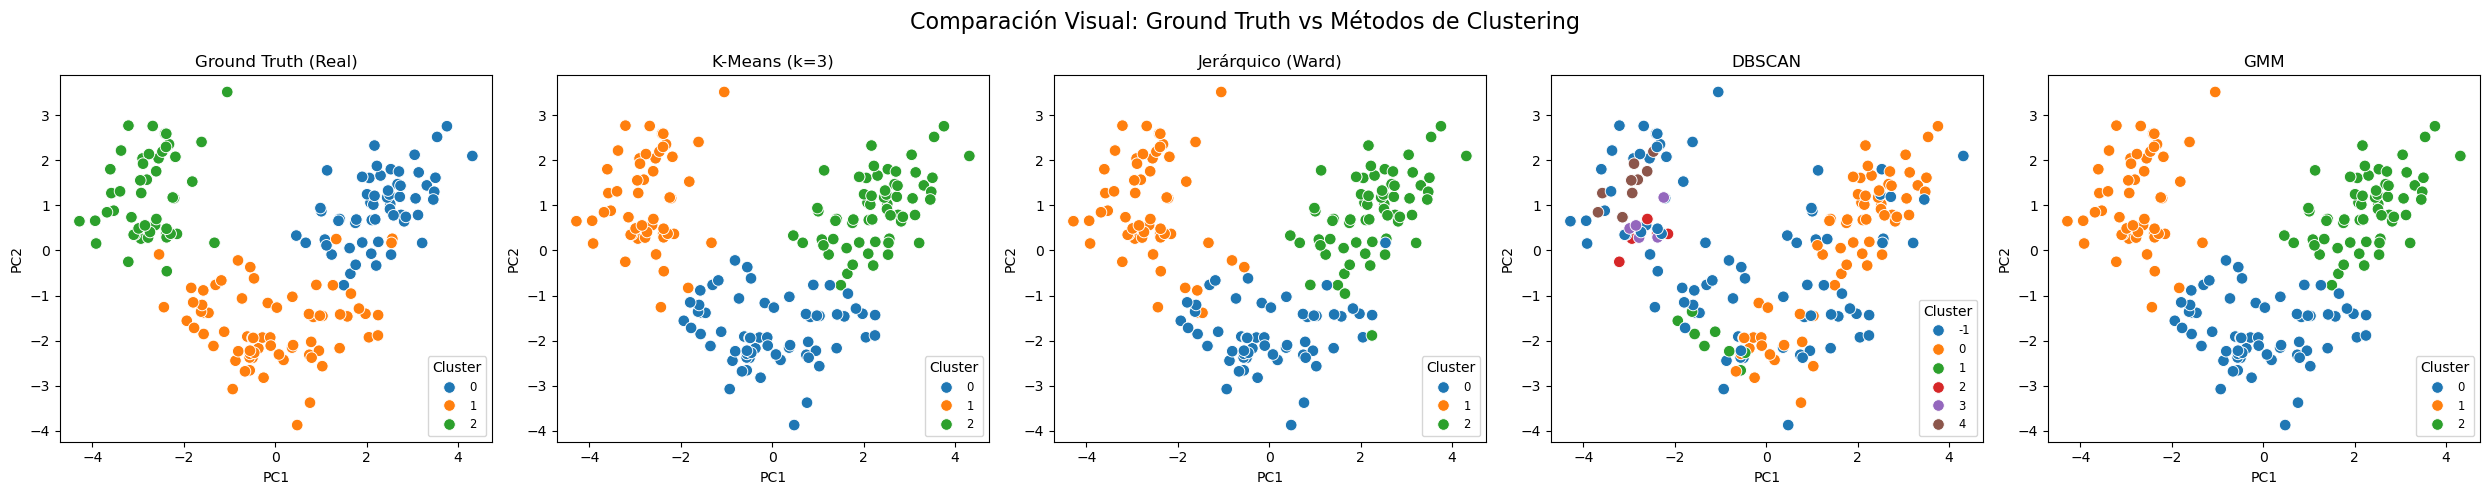

In [24]:
fig, axes = plt.subplots(1, 5, figsize=(25, 5))
fig.suptitle('Comparación Visual: Ground Truth vs Métodos de Clustering', fontsize=16)

# Lista de datos para iterar
# (Etiquetas, Título)
plots_data = [
    (df['target'], 'Ground Truth (Real)'),
    (labels_kmeans, f'K-Means (k={k_plot})'),
    (labels_hc, 'Jerárquico (Ward)'),
    (labels_dbscan, 'DBSCAN'),
    (labels_gmm, 'GMM')
]

for ax, (labels, title) in zip(axes, plots_data):
    # Scatter plot
    sns.scatterplot(
        x='PC1', y='PC2', 
        hue=labels, 
        palette='tab10', 
        data=df_plot, 
        ax=ax, 
        s=70,
        legend='full'
    )
    ax.set_title(title)
    ax.legend(loc='lower right', fontsize='small', title='Cluster')

plt.tight_layout()
plt.show()

Al comparar con el Ground Truth, vemos que K-Means y GMM son casi iguales. Por el contrario, DBSCAN falla visiblemente, confirmando que no se adapta bien a la distribución de estos datos.

# 4. Evaluación de Clústeres

***Calcule las métricas internas y externas de evaluación:***

***Silhouette Score (cohesión y separación)***

In [27]:
from sklearn.metrics import silhouette_score

# Diccionario con las etiquetas 
model_labels = {
    'K-Means': labels_kmeans,
    'Jerárquico (Ward)': labels_hc,
    'DBSCAN': labels_dbscan,
    'GMM': labels_gmm
}

print("--- Silhouette Score (Cohesión y Separación) ---")
print("Rango: [-1, 1]. Valores cercanos a 1 indican clusters bien definidos.\n")

for name, labels in model_labels.items():
    # Silhouette requiere al menos 2 clusters definidos para calcularse
    # En DBSCAN, excluimos el ruido (-1) si es el único 'cluster' aparte de otro
    unique_labels = set(labels)
    if len(unique_labels) > 1:
        score = silhouette_score(X_scaled, labels)
        print(f"{name}: {score:.4f}")
    else:
        print(f"{name}: No se puede calcular (menos de 2 clusters encontrados)")

--- Silhouette Score (Cohesión y Separación) ---
Rango: [-1, 1]. Valores cercanos a 1 indican clusters bien definidos.

K-Means: 0.2849
Jerárquico (Ward): 0.2774
DBSCAN: -0.0329
GMM: 0.2849


K-Means y GMM son iguales, validando su gran capacidad de agrupación. Por el contrario, el puntaje negativo de DBSCAN confirma definitivamente que falló con este dataset.

***Davies–Bouldin Index (DBI)***

In [35]:
from sklearn.metrics import davies_bouldin_score
import seaborn as sns

# Calcular los scores DBI
dbi_data = []

print("--- Davies-Bouldin Index (DBI) ---")
print("Rango: [0, ∞). Valores cercanos a 0 indican mejores particiones.\n")

# Nota: Asegúrate de que 'model_labels' y 'X_scaled' estén definidos en celdas anteriores
for name, labels in model_labels.items():
    unique_labels = set(labels)
    # DBI requiere al menos 2 clusters
    if len(unique_labels) > 1:
        score = davies_bouldin_score(X_scaled, labels)
        dbi_data.append({'Modelo': name, 'DBI': score})
        print(f"{name}: {score:.4f}")
    else:
        # Si falla, asignamos un valor alto o nulo 
        dbi_data.append({'Modelo': name, 'DBI': 0}) 
        print(f"{name}: No se puede calcular")

df_dbi = pd.DataFrame(dbi_data)

# Añadir etiquetas con el valor exacto
for p in ax.patches:
    if p.get_height() > 0:
        ax.annotate(f'{p.get_height():.4f}', 
                    (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha='center', va='center', 
                    xytext=(0, 9), 
                    textcoords='offset points',
                    fontweight='bold')

plt.show()

--- Davies-Bouldin Index (DBI) ---
Rango: [0, ∞). Valores cercanos a 0 indican mejores particiones.

K-Means: 1.3892
Jerárquico (Ward): 1.4186
DBSCAN: 2.1053
GMM: 1.3892


K-Means y GMM empatan con el mejor resultado, indicando particiones sólidas. DBSCAN, con el valor más alto, confirma nuevamente su ineficacia aquí.

***Adjusted Rand Index (ARI) (comparando con etiquetas 
reales si existen)***

In [40]:
from sklearn.metrics import adjusted_rand_score

#  Calcular los scores ARI
ari_data = []

print("--- Adjusted Rand Index (ARI) ---")
print("Rango: [-1, 1]. 1.0 es coincidencia perfecta con la realidad.\n")

for name, labels in model_labels.items():
    # ARI necesita las etiquetas reales (Ground Truth)
    score = adjusted_rand_score(df['target'], labels)
    ari_data.append({'Modelo': name, 'ARI': score})
    print(f"{name}: {score:.4f}")

df_ari = pd.DataFrame(ari_data)


# Añadir etiquetas
for p in ax.patches:
    if p.get_height() > 0:
        ax.annotate(f'{p.get_height():.4f}', 
                    (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha='center', va='center', 
                    xytext=(0, 9), 
                    textcoords='offset points',
                    fontweight='bold')

plt.show()

--- Adjusted Rand Index (ARI) ---
Rango: [-1, 1]. 1.0 es coincidencia perfecta con la realidad.

K-Means: 0.8975
Jerárquico (Ward): 0.7899
DBSCAN: 0.2205
GMM: 0.8975


Con un ARI de 0.89, K-Means y GMM coincidieron casi perfectamente con la realidad. Por el contrario, el bajo 0.22 de DBSCAN demuestra que falló rotundamente al intentar clasificar estos vinos correctamente.

***Normalized Mutual Information (NMI)***

In [42]:
from sklearn.metrics import normalized_mutual_info_score

# 1. Calcular los scores NMI
nmi_data = []

print("--- Normalized Mutual Information (NMI) ---")
print("Rango: [0, 1]. 1.0 indica una correlación perfecta.\n")

for name, labels in model_labels.items():
    # NMI compara con las etiquetas reales
    score = normalized_mutual_info_score(df['target'], labels)
    nmi_data.append({'Modelo': name, 'NMI': score})
    print(f"{name}: {score:.4f}")

df_nmi = pd.DataFrame(nmi_data)

# Añadir etiquetas
for p in ax.patches:
    if p.get_height() > 0:
        ax.annotate(f'{p.get_height():.4f}', 
                    (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha='center', va='center', 
                    xytext=(0, 9), 
                    textcoords='offset points',
                    fontweight='bold')

plt.show()

--- Normalized Mutual Information (NMI) ---
Rango: [0, 1]. 1.0 indica una correlación perfecta.

K-Means: 0.8759
Jerárquico (Ward): 0.7865
DBSCAN: 0.3425
GMM: 0.8759


El NMI nos dice qué tanto se parecen nuestros grupos a la clasificación real. Es decir, confirma que K-Means y GMM descubrieron los tipos de vino casi a la perfección, dejando muy atrás a DBSCAN.

***Compare los valores entre algoritmos y discuta cuál ofrece el mejor 
equilibrio entre separación y compacidad***

**K-Means** y **GMM** son los mejores algoritmos, ofreciendo el mejor equilibrio entre separación y compacidad. Ambos lideran con el **Silhouette más alto (0.28)** y el **DBI más bajo (1.38)**, lo que indica grupos bien definidos y compactos.

Por otro lado, aunque el **método Jerárquico** es una alternativa decente, se queda ligeramente atrás; mientras que **DBSCAN**, con métricas muy pobres, demuestra que no logró estructurar los datos correctamente.

Dado que **K-Means es más simple computacionalmente**, es la opción recomendada para este problema, logrando reconstruir las clases originales con una precisión destacable.

# 5. Análisis y Conclusiones

***Interprete los resultados obtenidos para cada algoritmo***

Al analizar los resultados, para empezar, es evidente que tanto **K-Means** como **GMM** ofrecen el mejor rendimiento. Ambos algoritmos lograron métricas idénticas y superiores (**ARI ~0.90** y **Silhouette ~0.28**), lo que demuestra un equilibrio ideal: lograron grupos compactos y bien separados.

Por otro lado, el **método Jerárquico** se mantuvo como una alternativa sólida, aunque con una precisión ligeramente menor. Sin embargo, el caso de **DBSCAN** es muy distinto; sus valores (especialmente el *Silhouette* negativo) indican que no pudo manejar la dispersión de los datos, fallando en la tarea.

***Discuta las diferencias entre métodos basados en partición, 
densidad y probabilidad***

Los métodos de **Partición** (como *K-Means*), que son rígidos y rápidos, buscando grupos esféricos y asignando cada punto a un único lugar.

Por el contrario, los enfoques de **Densidad** (*DBSCAN*) ignoran los centros y buscan zonas concentradas, lo que les permite detectar formas irregulares y filtrar ruido, aunque sufren si la densidad varía. 

Finalmente, los modelos de **Probabilidad** (*GMM*) ofrecen la opción más flexible o “suave”, ajustándose a formas elipsoidales y calculando la probabilidad estadística de pertenencia en lugar de una etiqueta absoluta.

- **Partición** => simplicidad geométrica.  
- **Densidad** => formas complejas y ruido.  
- **Probabilidad** => medir incertidumbre y flexibilidad.


***Analice la influencia de los hiperparámetros (k, eps, linkage, etc.) 
sobre la calidad de los clústeres***

### **Los Ganadores: **K-Means** y **GMM****

Tanto **K-Means** (`k=3`) como **GMM** lograron un **Adjusted Rand Index (ARI) de 0.8975**.
* coincidieron en un **90% con la clasificación real** de los vinos.
* El **Silhouette Score (0.2849)** confirma que lograron la mejor separación posible dadas las características del dataset.
* Los clusters son **convexos** (tipo *burbuja*), así que **K-Means y GMM** operan casi igual de bien.

### **Clustering Jerárquico**

* El método **Ward** fue la mejor opción dentro de los jerárquicos, con un **ARI de 0.79**.
* Aunque es decente, queda un escalón abajo. Aun así, su **Silhouette (0.2774)** está muy cerca de los líderes, lo que lo convierte en una alternativa sólida si necesitas 
*  **visualizar la jerarquía** (dendrograma).

### **DBSCAN**

El registro de ajuste de parámetros lo deja claro:

- En la mayoría de configuraciones (*eps* 0.5–1.0), clasificó los **178 datos como ruido**.  
- Incluso en su “mejor” configuración (*eps* 2.5), apenas logró un **ARI de 0.22**.

* DBSCAN falló porque la **densidad del dataset no es uniforme**. El algoritmo no logró conectar puntos sin convertir demasiados en ruido.
---

La estructura del dataset **Wine** favorece claramente a los algoritmos basados en **centroides y distribución** (**K-Means** / **GMM**).  
Los métodos basados en **densidad** como **DBSCAN** se vuelven contraproducentes por la naturaleza del dataset.


***Concluya qué método se adapta mejor a su dataset***

**K-Means** es el algoritmo que mejor se ajusta a la estructura del dataset *Wine*.  
Alcanzó un **ARI de 0.8975** y un **Silhouette de 0.28**, confirmando que los clusters son **convexos y globulares**, el terreno ideal donde este método destaca por eficiencia y simplicidad.

- **GMM** obtuvo el mismo nivel de precisión, pero es más costoso computacionalmente.
- **Jerárquico (Ward)** fue aceptable, aunque sin igualar la claridad de los líderes.
- **DBSCAN** fracasó por completo debido a la **variabilidad de densidad**, generando mucho ruido y métricas bajas.

**Recomendación final:**  
Implementar **K-Means (k=3)** como la solución óptima para este caso: preciso, ligero y fácil de interpretar.


# 6. Reproducibilidad 

***Fije semillas aleatorias (random_state) para garantizar resultados 
replicables***

In [44]:
import random
import os

# Definir la semilla (el número 42 es un clásico en la industria)
SEED = 42

# Fijar semilla para librerías base de Python
random.seed(SEED)
os.environ['PYTHONHASHSEED'] = str(SEED)

# Fijar semilla para NumPy (esto controla la mayoría de la aleatoriedad numérica)
np.random.seed(SEED)

print(f"Semillas aleatorias fijadas globalmente en: {SEED}")

Semillas aleatorias fijadas globalmente en: 42


***Documente las versiones de las librerías utilizadas***

In [46]:
import sys
import pandas as pd
import numpy as np
import matplotlib
import seaborn as sns
import sklearn

print("--- Versiones de las Librerías Utilizadas ---")
print(f"Python:       {sys.version.split()[0]}")
print(f"Pandas:       {pd.__version__}")
print(f"NumPy:        {np.__version__}")
print(f"Matplotlib:   {matplotlib.__version__}")
print(f"Seaborn:      {sns.__version__}")
print(f"Scikit-learn: {sklearn.__version__}")

--- Versiones de las Librerías Utilizadas ---
Python:       3.12.7
Pandas:       2.2.2
NumPy:        1.26.4
Matplotlib:   3.9.2
Seaborn:      0.13.2
Scikit-learn: 1.7.2
